In [5]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [7]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [8]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [11]:
cnn = tf.keras.models.Sequential()

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [19]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [21]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [23]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [25]:
cnn.add(tf.keras.layers.Flatten())

In [27]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [29]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [31]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [33]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [45]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 722s 325ms/step - loss: 1.3200 - accuracy: 0.6123 - val_loss: 0.5706 - val_accuracy: 0.8203
Epoch 2/10
2197/2197 [==============================] - 365s 166ms/step - loss: 0.4233 - accuracy: 0.8642 - val_loss: 0.2411 - val_accuracy: 0.9217
Epoch 3/10
2197/2197 [==============================] - 290s 132ms/step - loss: 0.2614 - accuracy: 0.9159 - val_loss: 0.2557 - val_accuracy: 0.9151
Epoch 4/10
2197/2197 [==============================] - 294s 134ms/step - loss: 0.1774 - accuracy: 0.9410 - val_loss: 0.1946 - val_accuracy: 0.9399
Epoch 5/10
2197/2197 [==============================] - 294s 134ms/step - loss: 0.1330 - accuracy: 0.9560 - val_loss: 0.1601 - val_accuracy: 0.9519
Epoch 6/10
2197/2197 [==============================] - 293s 133ms/step - loss: 0.1034 - accuracy: 0.9662 - val_loss: 0.1257 - val_accuracy: 0.9609
Epoch 7/10
2197/2197 [==============================] - 291s 132ms/step - loss: 0.0856 - accuracy: 0.9717 - val_

In [47]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 168s 76ms/step - loss: 0.0351 - accuracy: 0.9884
Training accuracy: 0.9883633255958557


In [49]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 43s 77ms/step - loss: 0.1229 - accuracy: 0.9637
Validation accuracy: 0.9637491703033447


In [51]:
cnn.save('trained_plant_disease_model.keras')

In [53]:
training_history.history #Return Dictionary of history

{'loss': [1.3200396299362183,
  0.4232565462589264,
  0.2614136040210724,
  0.17740052938461304,
  0.1329970806837082,
  0.10338091850280762,
  0.08556204289197922,
  0.07120436429977417,
  0.05959330499172211,
  0.055519238114356995],
 'accuracy': [0.6123052835464478,
  0.8641582131385803,
  0.9159257411956787,
  0.9410484433174133,
  0.9559854865074158,
  0.9662280678749084,
  0.9716622829437256,
  0.9765843749046326,
  0.9807525277137756,
  0.9815492033958435],
 'val_loss': [0.5705764293670654,
  0.24114049971103668,
  0.2557467520236969,
  0.1945894956588745,
  0.1601390689611435,
  0.1256970763206482,
  0.12056949734687805,
  0.1390364170074463,
  0.11886166781187057,
  0.12294745445251465],
 'val_accuracy': [0.8202822804450989,
  0.9216936230659485,
  0.9150921702384949,
  0.9399043917655945,
  0.9519121050834656,
  0.9609037041664124,
  0.9621556997299194,
  0.9592533707618713,
  0.9659116864204407,
  0.9637491703033447]}

In [55]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [57]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


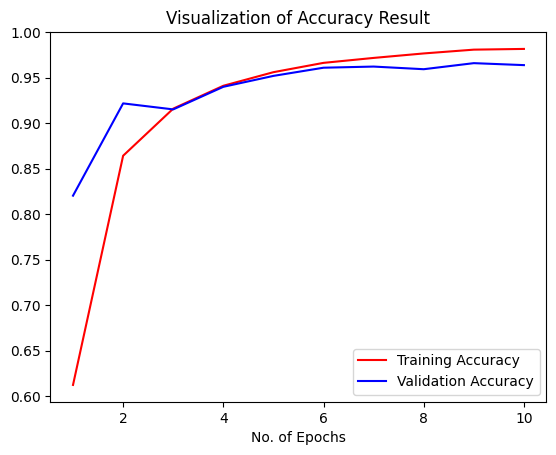

In [59]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [61]:
class_name = validation_set.class_names

In [63]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [65]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 156s 9ms/step


In [67]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [69]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [71]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [73]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [75]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.93      0.95       504
                                 Apple___Black_rot       0.96      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.97       440
                                   Apple___healthy       0.92      0.98      0.95       502
                               Blueberry___healthy       0.98      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.97      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.84      0.98      0.90       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.98      0.87      0.

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

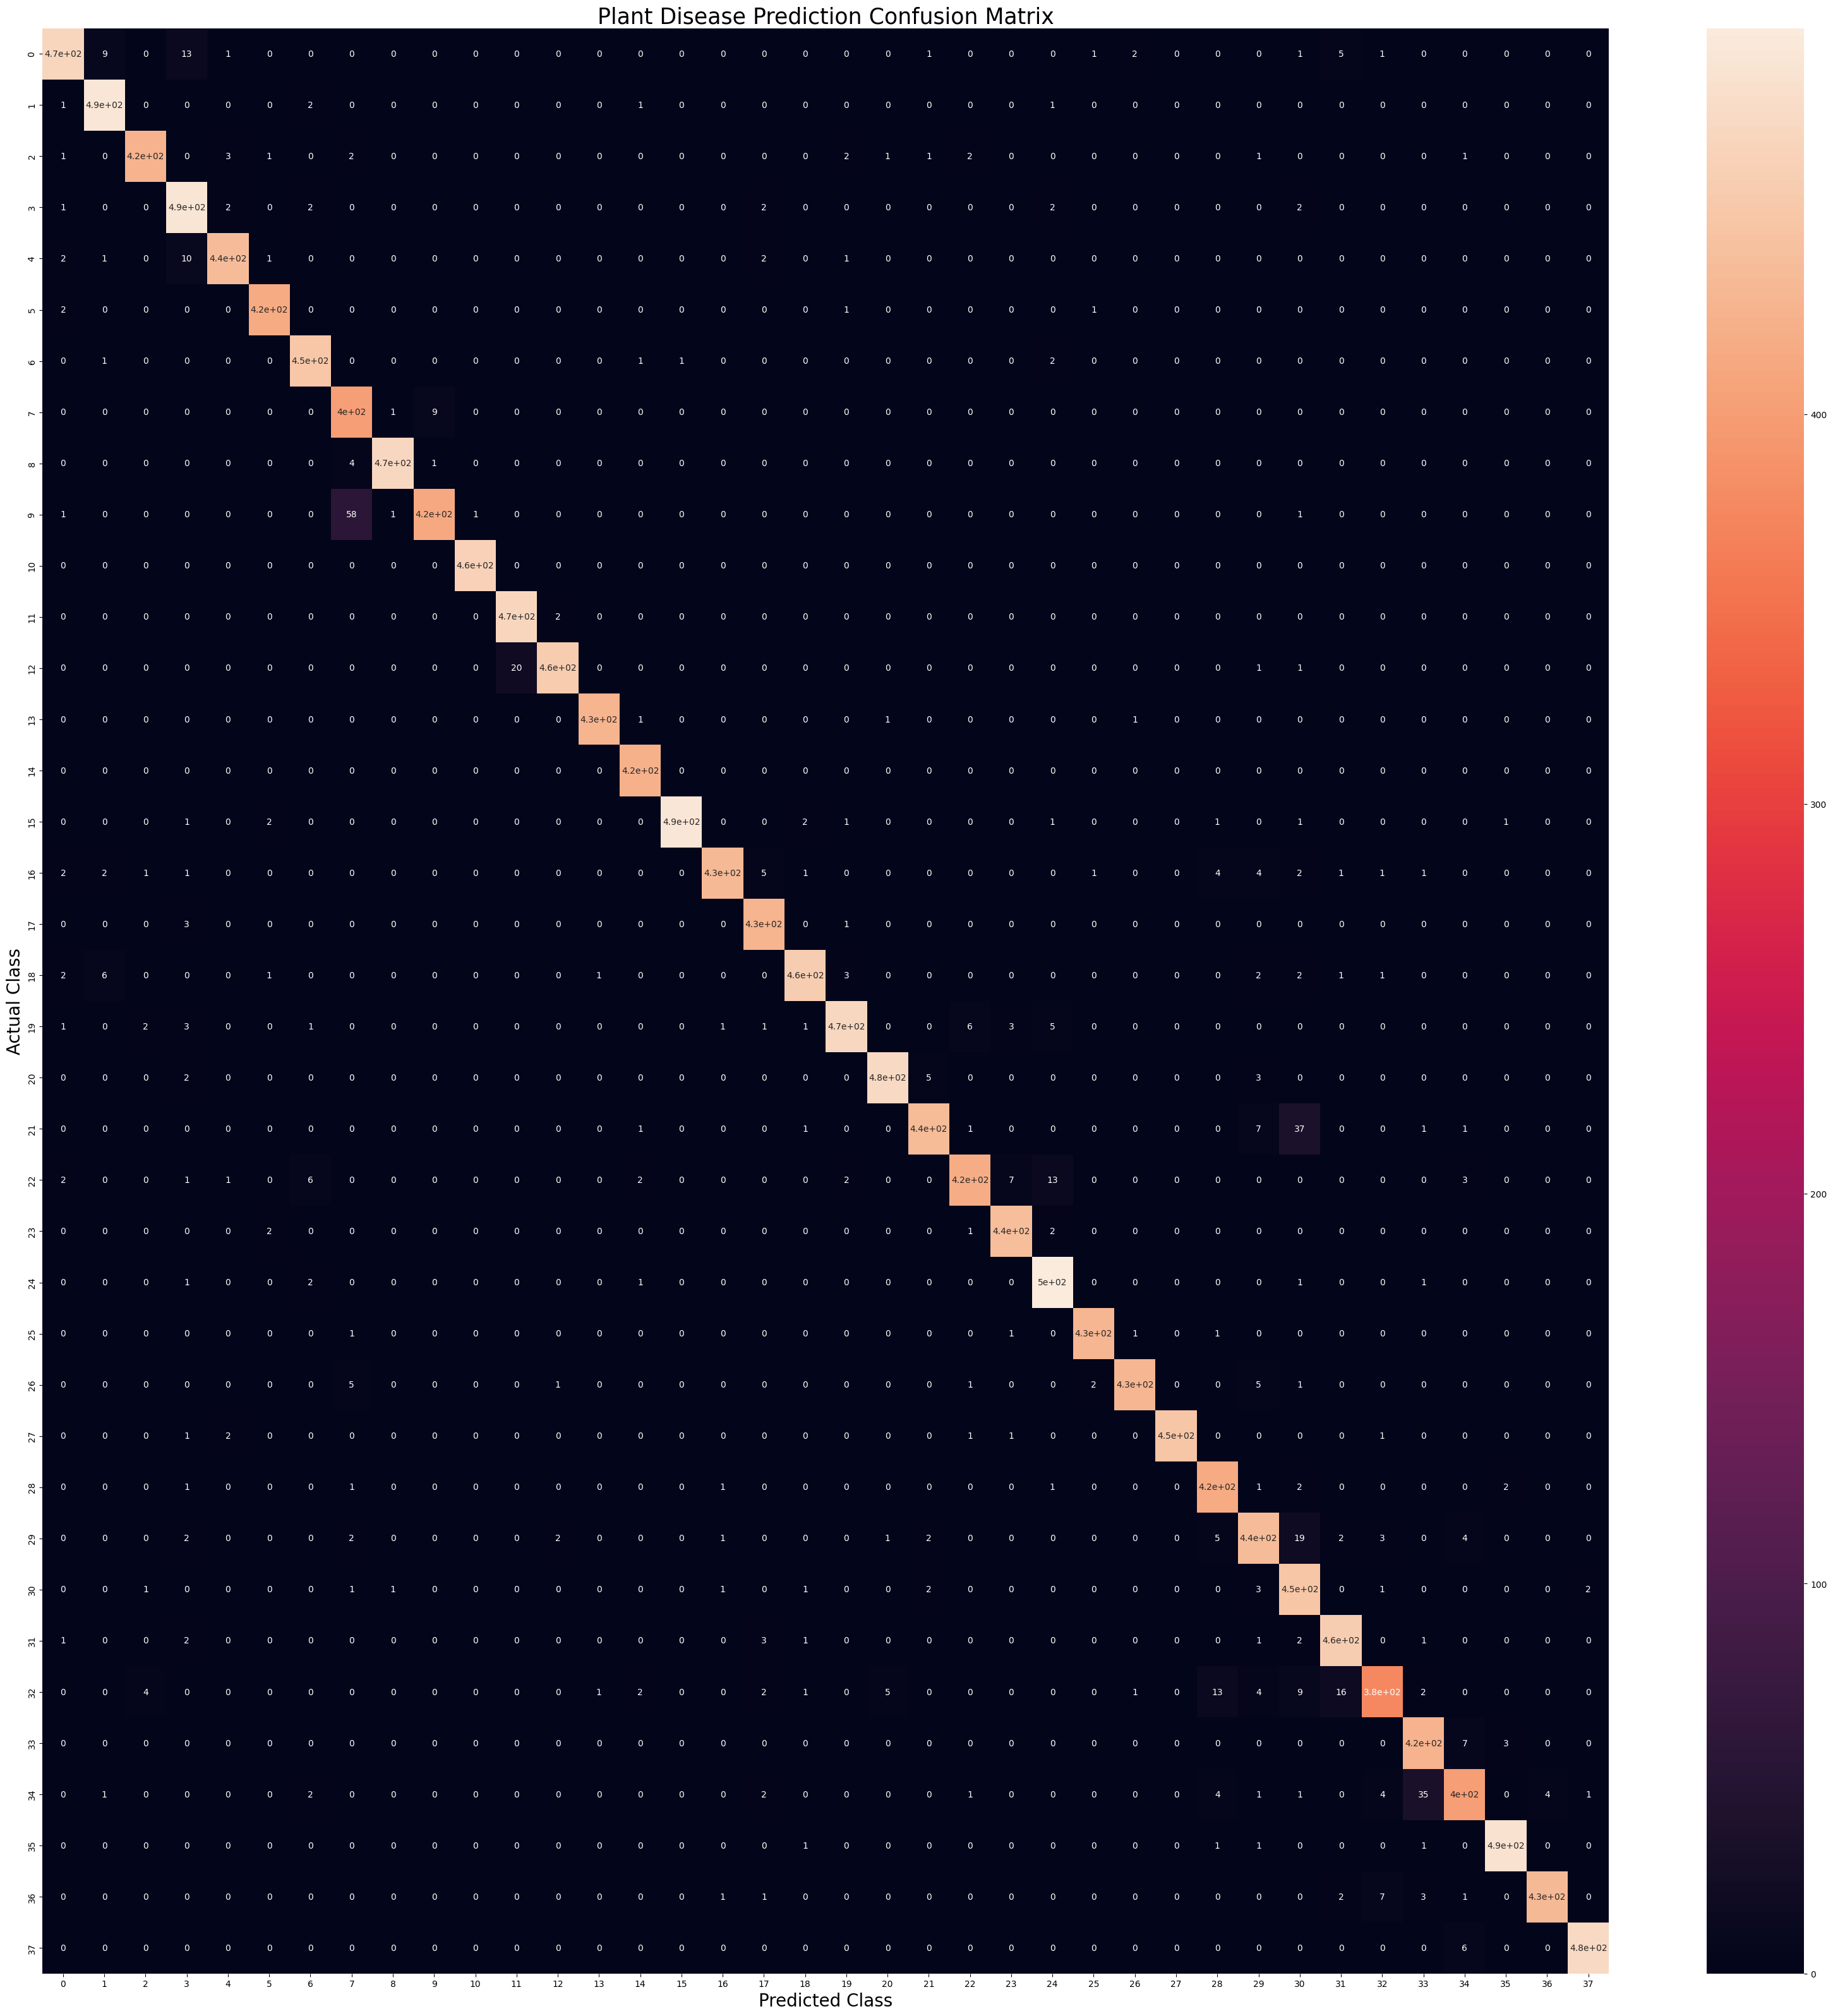

In [83]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()